<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/ComputerVision/230912_fast_sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (634/634), done.
remote: Compressing objects: 100% (473/473), done.
remote: Total 1160 (delta 172), reused 575 (delta 153), pack-reused 526
Receiving objects: 100% (1160/1160), 72.45 MiB | 40.49 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [ ]:
!pip install -r ./FastSAM/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determin

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-kkxti3w9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-kkxti3w9
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=89392de37de9307a1b1e6b789b772288a4c84f23a2fd129a94b275c7f1e747a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qtafjvw1/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import os
os.mkdir('weights')

In [ ]:
os.mkdir('images')

In [ ]:
os.chdir('images')

In [ ]:
!pwd

/content/images


In [ ]:
!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

In [ ]:
os.chdir('/content/FastSAM')

In [ ]:
from fastsam import FastSAM, FastSAMPrompt

model = FastSAM('../weights/FastSAM-s.pt')
IMAGE_PATH = '../images/dog.jpeg'
DEVICE = 'cpu'
results = model(IMAGE_PATH, device=DEVICE,retina_masks=True, imgsz=1024, conf=0.4, iou=0.9)
prompt_process = FastSAMPrompt(IMAGE_PATH,results,device=DEVICE)

ann = prompt_process.text_prompt(text='a photo of a cap')

prompt_process.plot(annotations=ann , output_path='./output/dog.jpg')


image 1/1 /content/FastSAM/../images/dog.jpeg: 1024x576 52 objects, 1079.4ms
Speed: 6.5ms preprocess, 1079.4ms inference, 653.2ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
from fastsam import FastSAM, FastSAMPrompt

model = FastSAM('../weights/FastSAM-s.pt')
IMAGE_PATH = '../images/dog.jpeg'
DEVICE = 'cpu'
results = model(IMAGE_PATH, device=DEVICE,retina_masks=True, imgsz=1024, conf=0.4, iou=0.9)
prompt_process = FastSAMPrompt(IMAGE_PATH,results,device=DEVICE)

#ann = prompt_process.box_prompt(bbox=[[200,200,300,300]])
#ann = prompt_process.everything_prompt()
ann = prompt_process.text_prompt(text='a photo of a cap')
#ann = prompt_process.point_prompt(points=[[50,50]],pointlabel=[1])


prompt_process.plot(annotations=ann , output_path='./output/dog.jpg')


image 1/1 /content/FastSAM/../images/dog.jpeg: 1024x576 52 objects, 1043.9ms
Speed: 6.3ms preprocess, 1043.9ms inference, 770.8ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
ann.shape

(1, 1280, 720)

In [ ]:
ann

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

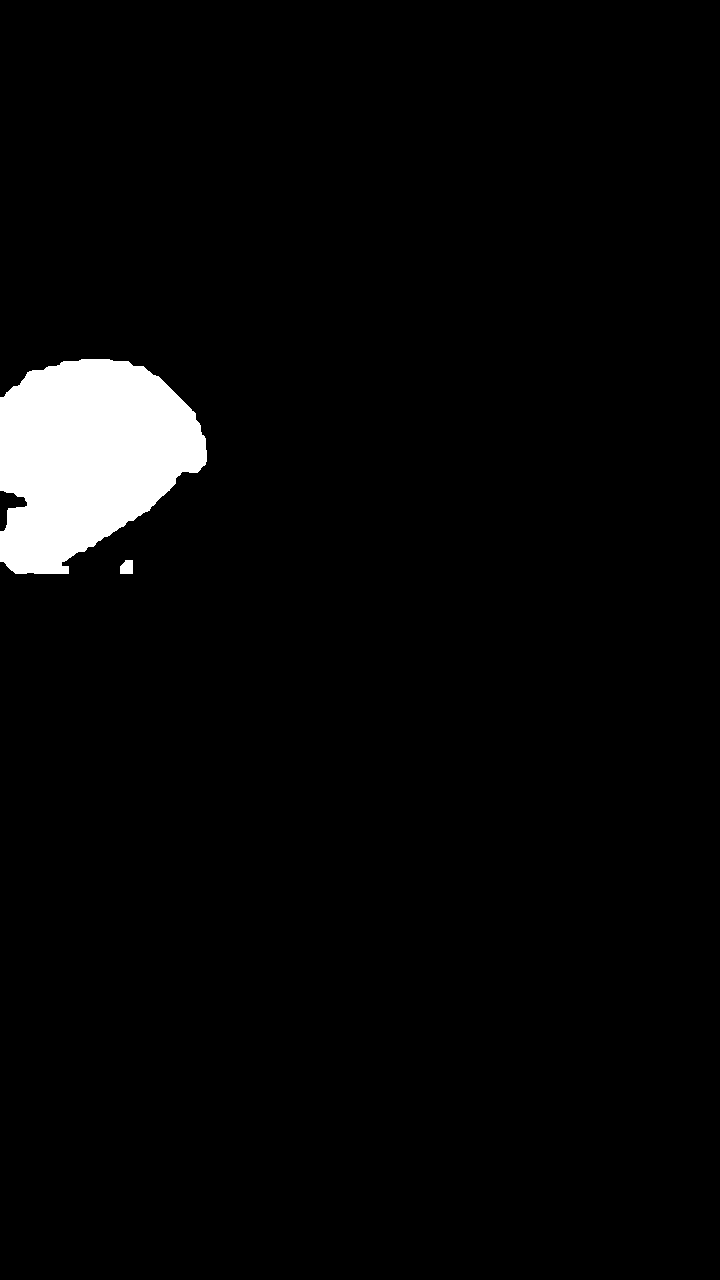

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

annotations = np.array(ann)
annotations = annotations.reshape(1280,720)
annotations = annotations * 255
cv2_imshow(annotations)